# SA

1. list-based simulated annealing
    ###### 1. A list-based simulated annealing algorithm with crossover operator for the traveling salesman problem (doi.org/10.1007/s00521-021-06883-x) (2021)
    2. List-Based Simulated Annealing Algorithm for Traveling Salesman Problem, Zhan (doi.org/10.1155/2016/1712630) (2015)
    3. Enhanced List-Based Simulated Annealing Algorithm for Large-Scale Traveling Salesman Problem (doi.org/10.1109/ACCESS.2019.2945570)
    4. A hybrid genetic algorithm, list-based simulated annealing algorithm, and different heuristic algorithms for travelling salesman problem (doi.org/10.1093/jigpal/jzac028)
2. nested simulated annealing
    1. Nested Simulated Annealing Algorithm to Solve Large-Scale TSP Problem
3. tabu search simulated annealing
    ###### 1. Developing a dynamic neighborhood structure for an adaptive hybrid simulated annealing – tabu search algorithm to solve the symmetrical traveling salesman problem, Yu (doi.org/10.1016/j.asoc.2016.08.036)
    
###### 5. Traveling-Salesman-Problem Algorithm Based on Simulated Annealing and Gene-Expression Programming
###### 6. Solving the traveling salesman problem based on an adaptive simulated annealing algorithm with greedy search

# GA

1. Optimization of Traveling Salesman Problem Using Affinity Propagation Clustering and Genetic Algorithm
2. An Improved Genetic Algorithm with Initial Population Strategy for Symmetric TSP
3. The hybrid genetic algorithm with two local optimization strategies for traveling salesman problem
4. Multi-offspring genetic algorithm and its application to the traveling salesman problem

In [1]:
# package list
import numpy as np
import sys
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import time

In [2]:
# Plot Settings
PLOT_MODE = True # Draw Route
PLT_INTERVAL = 100 # Draw Route every 100 iterations
plt.ion()

## Data Loading

In [3]:
def fileloader():
    with open(file_path, "r") as file:
        file_str = file.readlines()

    # Get the coordinates of cities
    coord_str = file_str[8:-1]  # first city string to last city string (EOF 전까지)
    coord_list = np.zeros((len(coord_str), 2))
    for idx, item in enumerate(coord_str):
        items = item.split()
        coord_list[idx, 0], coord_list[idx, 1] = float(items[1]), float(items[2])

    return coord_list

In [4]:
file_path = 'fi10639.tsp'

# 

# [Level 1: Beginning] TA Sample Code

In [5]:
# First City Index
FIRST_IDX = 0

## Greedy

In [6]:
def path_cost(path_map, path):
    # The array of cost between cities in the path
    cnt_cities = path_map.shape[0]
    cost_arr = np.zeros(cnt_cities)
    for i in range(cnt_cities):
        cost_arr[i] = path_map[path[i], path[i+1]]

    return cost_arr

def greedy(coord_list):
    cnt_cities = len(coord_list)
    # Initialize path and insert first city index to the first and last elements
    best_path = np.zeros(cnt_cities + 1, dtype=np.int32)
    best_path[0], best_path[-1] = FIRST_IDX, FIRST_IDX

    # Euclidean distance map between cities
    path_map = euclidean_distances(coord_list, coord_list)

    cities_tovisit = np.ones((cnt_cities), dtype=np.bool_)
    cities_tovisit[FIRST_IDX] = False

    # Iteratively Connect nearest cities
    for i in range(1, cnt_cities):
        start_idx = best_path[i - 1]
        distance_from_start = path_map[start_idx, :]
        nearest_list = np.argsort(distance_from_start)
        for idx in range(len(nearest_list)):
            # check the nearest city is visited
            if cities_tovisit[nearest_list[idx]]:
                nearest_city = nearest_list[idx]
                break
        cities_tovisit[nearest_city] = False
        best_path[i] = nearest_city
        
    cost_arr = path_cost(path_map, best_path)
    best_cost = cost_arr.sum()
    
    # Draw Route
    if PLOT_MODE:
        plt.close()
        figure, ax = plt.subplots()
        plt.scatter(coord_list[:, 0], coord_list[:, 1], c='red', s=10)
        plt.title('City Route')
        coord_path = coord_list
        coord_path = np.append(coord_path, coord_path[best_path[0], :].reshape(1, 2), axis=0)
        coord_path[:, :] = coord_path[best_path, :]
        lines, = ax.plot(coord_path[:, 0], coord_path[:, 1], 'k--')
        figure.canvas.draw()
        figure.canvas.flush_events()
        plt.show()
    
    return best_path, best_cost

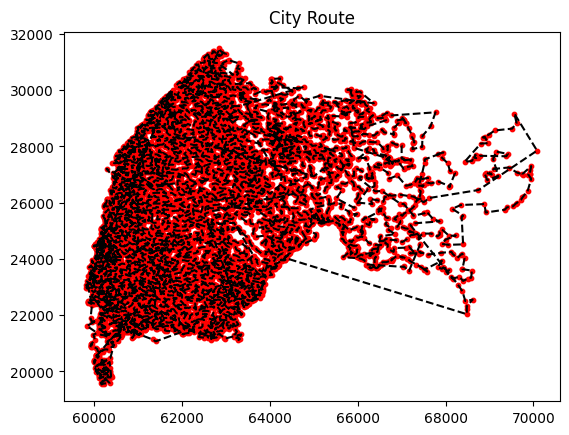

Execution Time: 5.996981859207153
Path: [0, 3, 35, 52, 66, 65, 64, 63, 34, 51, 75, 74, 116, 143, 117, 176, 211, 292, 291, 385, 496, 631, 694, 746, 747, 792, 843, 947, 993, 900, 946, 1034, 945, 791, 745, 629, 630, 562, 495, 384, 290, 289, 333, 383, 493, 560, 627, 628, 561, 494, 252, 210, 175, 142, 141, 174, 115, 209, 251, 250, 288, 332, 380, 381, 382, 433, 492, 626, 692, 693, 744, 790, 842, 841, 898, 897, 944, 943, 990, 1031, 1078, 1030, 989, 942, 941, 895, 838, 894, 893, 940, 988, 1029, 1076, 1028, 987, 1027, 1026, 986, 1025, 1119, 1120, 1165, 1166, 1167, 1247, 1246, 1248, 1291, 1292, 1293, 1332, 1249, 1169, 1168, 1077, 1170, 1171, 1204, 1294, 1295, 1250, 1205, 1173, 1172, 1121, 1079, 1032, 992, 991, 840, 896, 839, 743, 625, 559, 490, 491, 432, 331, 249, 287, 286, 248, 208, 172, 207, 285, 379, 624, 742, 892, 891, 939, 938, 985, 984, 937, 890, 889, 888, 936, 983, 982, 1024, 1070, 1114, 1159, 1160, 1161, 1162, 1115, 1071, 1116, 1163, 1202, 1243, 1290, 1242, 1201, 1241, 1289, 1288, 1368, 

In [7]:
# Step 1
try:
    coord_list = fileloader()
except Exception as e:
    print('예외 발생', e)
    sys.exit()

start_time = time.time()

# Step 2
best_path, best_cost = greedy(coord_list)

print('Execution Time: ' + str(time.time() - start_time))
print('Path: ' + str(best_path.tolist()))
print('Cost: ' + str(best_cost))

## 

## SA

In [73]:
# Global Variables
# SA
MAX_EVALUATION = 1000
SUB_ITERATIONS = 100
TEMPERATURE = 100
COOLING_RATIO = 0.5
TEMP_LIMIT = 1

In [74]:
def initialize_greedy(coord_list, first_idx):
    cnt_cities = len(coord_list)
    # Initialize path and insert first city index to the first and last elements
    path = np.zeros(cnt_cities + 1, dtype=np.int32)
    path[0], path[-1] = first_idx, first_idx

    # Euclidean distance map between cities
    path_map = euclidean_distances(coord_list, coord_list)

    cities_tovisit = np.ones((cnt_cities), dtype=np.bool_)
    cities_tovisit[first_idx] = False

    # Iteratively Connect nearest cities
    for i in range(1, cnt_cities):
        start_idx = path[i - 1]
        distance_from_start = path_map[start_idx, :]
        nearest_list = np.argsort(distance_from_start)
        for idx in range(len(nearest_list)):
            # check the nearest city is visited
            if cities_tovisit[nearest_list[idx]]:
                nearest_city = nearest_list[idx]
                break
        cities_tovisit[nearest_city] = False
        path[i] = nearest_city

    return path_map, path

def path_cost(path_map, path):
    # The array of cost between cities in the path
    cnt_cities = path_map.shape[0]
    cost_arr = np.zeros(cnt_cities)
    for i in range(cnt_cities):
        cost_arr[i] = path_map[path[i], path[i+1]]

    return cost_arr

In [75]:
def two_opt_swap(path_map, path, iterations, coord_list, sa_start_time):
    cnt_cities = path_map.shape[0]
    # Save the best path

    cost_arr = path_cost(path_map, path)
    best_path = path.copy()
    best_cost = cost_arr.sum()
    
    for i in range(iterations):
        
        ### add time limit ###
        if time.time() - sa_start_time > 53:
            break
        
        curr_path = best_path.copy()
        # Select two indices of flip points
        sel_idx = np.sort(np.random.choice(np.arange(1, cnt_cities + 1), 2))

        # Path Flip and update cost array
        curr_path[sel_idx[0]:sel_idx[1]] = np.flip(curr_path[sel_idx[0]: sel_idx[1]])
        cost_arr = path_cost(path_map, curr_path)

        # Compare to the best path
        curr_cost = cost_arr.sum()
        if curr_cost < best_cost:
            best_path = curr_path
            best_cost = curr_cost
    
    temperature = TEMPERATURE
    while temperature > TEMP_LIMIT:
        
        ### add time limit ###
        if time.time() - sa_start_time > 53:
            break
        
        curr_path = best_path.copy()
        # Select two indices of flip points
        sel_idx = np.sort(np.random.choice(np.arange(1, cnt_cities + 1), 2))

        # Path Flip and update cost array
        curr_path[sel_idx[0]:sel_idx[1]] = np.flip(curr_path[sel_idx[0]: sel_idx[1]])
        cost_arr = path_cost(path_map, curr_path)
        curr_cost = cost_arr.sum()

        if curr_cost <= best_cost:
            best_path, best_cost = curr_path, curr_cost
        else:
            prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))
            if prob > np.random.rand(1):
                best_path, best_cost = curr_path, curr_cost
        temperature = temperature * COOLING_RATIO 
    return best_path, best_cost

In [76]:
def sa(path_map, path, coord_list):
    best_path, best_cost = path.copy() , path_cost(path_map, path).sum()
    global TEMPERATURE
    
    sa_start_time = time.time()

    for i in range(MAX_EVALUATION):
        
        ### add time limit ###
        if time.time() - sa_start_time > 53:
            break
        
        curr_path = best_path.copy()
        new_path, new_cost = two_opt_swap(path_map, curr_path, SUB_ITERATIONS, coord_list, sa_start_time)

        if new_cost < best_cost:
            best_path, best_cost = new_path, new_cost
            

    if PLOT_MODE:
        plt.close()
        figure, ax = plt.subplots()
        plt.scatter(coord_list[:, 0], coord_list[:, 1], c='red', s=10)
        plt.title('City Route')
        coord_path = coord_list
        coord_path = np.append(coord_path, coord_path[best_path[0], :].reshape(1, 2), axis=0)
        coord_path[:, :] = coord_path[best_path, :]
        lines, = ax.plot(coord_path[:, 0], coord_path[:, 1], 'k--')
        figure.canvas.draw()
        figure.canvas.flush_events()
        plt.show()

    return best_path, best_cost

/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2891999357.py:48: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


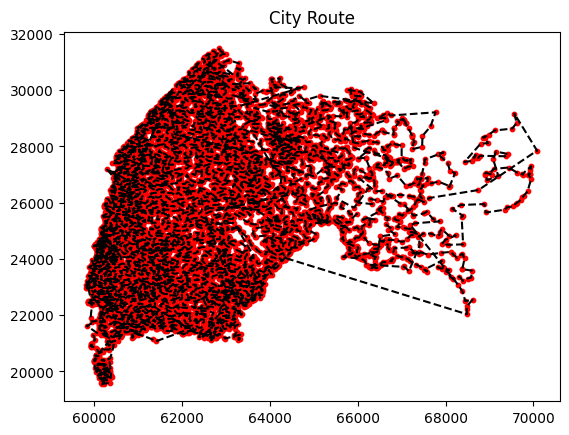

Execution Time: 59.13148307800293
Path: [0, 3, 35, 52, 66, 65, 64, 63, 34, 51, 75, 74, 116, 143, 117, 176, 211, 292, 291, 385, 496, 631, 694, 746, 747, 792, 843, 947, 993, 900, 946, 1034, 945, 791, 745, 629, 630, 562, 495, 384, 290, 289, 333, 383, 493, 560, 627, 628, 561, 494, 252, 210, 175, 142, 141, 174, 115, 209, 251, 250, 288, 332, 380, 381, 382, 433, 492, 626, 692, 693, 744, 790, 842, 841, 898, 897, 944, 943, 990, 1031, 1078, 1030, 989, 942, 941, 895, 838, 894, 893, 940, 988, 1029, 1076, 1028, 987, 1027, 1026, 986, 1025, 1119, 1120, 1165, 1166, 1167, 1247, 1246, 1248, 1291, 1292, 1293, 1332, 1249, 1169, 1168, 1077, 1170, 1171, 1204, 1294, 1295, 1250, 1205, 1173, 1172, 1121, 1079, 1032, 992, 991, 840, 896, 839, 743, 625, 559, 490, 491, 432, 331, 249, 287, 286, 248, 208, 172, 207, 285, 379, 624, 742, 892, 891, 939, 938, 985, 984, 937, 890, 889, 888, 936, 983, 982, 1024, 1070, 1114, 1159, 1160, 1161, 1162, 1115, 1071, 1116, 1163, 1202, 1243, 1290, 1242, 1201, 1241, 1289, 1288, 1368, 

In [77]:
# Initialization ###############
initialize = initialize_greedy
################################

# Step 1
try:
    coord_list = fileloader()
except Exception as e:
    print('예외 발생', e)
    sys.exit()

start_time = time.time()
# Step 2
path_map, path = initialize(coord_list, FIRST_IDX)

# Step 3
best_path, best_cost = sa(path_map, path, coord_list)

print('Execution Time: ' + str(time.time() - start_time))
print('Path: ' + str(best_path.tolist()))
print('Cost: ' + str(best_cost))

##  

## GA

In [13]:
# Global Variables
# GA
POOL_SIZE = 20 
TOURNAMENT_SIZE = 5
MAX_ITERATION = 100000

# SA
### modified due to time constraint ###
MAX_EVALUATION = 50
SUB_ITERATIONS = 10
TEMPERATURE = 50
COOLING_RATIO = 0.3
TEMP_LIMIT = 1

In [14]:
def initialize_greedy(coord_list, first_idx):
    cnt_cities = len(coord_list)
    # Initialize path and insert first city index to the first and last elements
    path = np.zeros(cnt_cities + 1, dtype=np.int32)
    path[0], path[-1] = first_idx, first_idx

    # Euclidean distance map between cities
    path_map = euclidean_distances(coord_list, coord_list)

    cities_tovisit = np.ones((cnt_cities), dtype=np.bool_)
    cities_tovisit[first_idx] = False

    # Iteratively Connect nearest cities
    for i in range(1, cnt_cities):
        start_idx = path[i - 1]
        distance_from_start = path_map[start_idx, :]
        nearest_list = np.argsort(distance_from_start)
        for idx in range(len(nearest_list)):
            # check the nearest city is visited
            if cities_tovisit[nearest_list[idx]]:
                nearest_city = nearest_list[idx]
                break
        cities_tovisit[nearest_city] = False
        path[i] = nearest_city

    return path_map, path


def initialize_random(coord_list, first_idx):
    cnt_cities = len(coord_list)
    path = np.zeros(cnt_cities + 1, dtype=np.int32)

    path[0], path[-1] = first_idx, first_idx
    # Euclidean distance map between cities
    path_map = euclidean_distances(coord_list, coord_list)

    # city indices without first city index
    cities_tovisit = np.delete(np.arange(cnt_cities), first_idx)
    cities_random = np.random.permutation(cities_tovisit)
    path[1:-1] = cities_random

    return path_map, path

def path_cost(path_map, path):
    # The array of cost between cities in the path
    cnt_cities = path_map.shape[0]
    cost_arr = np.zeros(cnt_cities)
    for i in range(cnt_cities):
        cost_arr[i] = path_map[path[i], path[i+1]]

    return cost_arr

In [15]:
def two_opt_swap(path_map, path, iterations, coord_list):
    cnt_cities = path_map.shape[0]
    # Save the best path

    cost_arr = path_cost(path_map, path)
    best_path = path.copy()
    best_cost = cost_arr.sum()
    
    for i in range(iterations):
        curr_path = best_path.copy()
        # Select two indices of flip points
        sel_idx = np.sort(np.random.choice(np.arange(1, cnt_cities + 1), 2))

        # Path Flip and update cost array
        curr_path[sel_idx[0]:sel_idx[1]] = np.flip(curr_path[sel_idx[0]: sel_idx[1]])
        cost_arr = path_cost(path_map, curr_path)

        # Compare to the best path
        curr_cost = cost_arr.sum()
        if curr_cost < best_cost:
            best_path = curr_path
            best_cost = curr_cost
    
    temperature = TEMPERATURE
    while temperature > TEMP_LIMIT:
        curr_path = best_path.copy()
        # Select two indices of flip points
        sel_idx = np.sort(np.random.choice(np.arange(1, cnt_cities + 1), 2))

        # Path Flip and update cost array
        curr_path[sel_idx[0]:sel_idx[1]] = np.flip(curr_path[sel_idx[0]: sel_idx[1]])
        cost_arr = path_cost(path_map, curr_path)
        curr_cost = cost_arr.sum()

        if curr_cost <= best_cost:
            best_path, best_cost = curr_path, curr_cost
        else:
            prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))
            if prob > np.random.rand(1):
                best_path, best_cost = curr_path, curr_cost
        temperature = temperature * COOLING_RATIO 
    return best_path, best_cost

In [16]:
def sa(path_map, path, coord_list):
    best_path, best_cost = path.copy() , path_cost(path_map, path).sum()

    for i in range(MAX_EVALUATION):
        curr_path = best_path.copy()
        new_path, new_cost = two_opt_swap(path_map, curr_path, SUB_ITERATIONS, coord_list)

        if new_cost < best_cost:
            best_path, best_cost = new_path, new_cost
            
    return best_path, best_cost

In [17]:
def initialization(coord_list):
    cnt_cities = len(coord_list)
    path_pool = np.zeros((POOL_SIZE, cnt_cities + 1), dtype=np.int32)
    pool_cost = np.zeros(POOL_SIZE)
    
    path_map, path_pool[0, :] = initialize_greedy(coord_list, FIRST_IDX)
    pool_cost[0] = path_cost(path_map, path_pool[0, :]).sum()

    print('Path {} is initialized'.format(0))

    for i in range(1, POOL_SIZE):
        _, path_pool[i, :] = initialize_random(coord_list, FIRST_IDX)
        path_pool[i, :], pool_cost[i] = sa(path_map, path_pool[i, :], coord_list)
        print('Path {} is initialized'.format(i))
    
    return path_pool, pool_cost, path_map

In [18]:
def selection(pool_cost, TOURNAMENT_SIZE, sel_size=2):
    # tournament selection
    sel_idx = np.random.choice(POOL_SIZE, TOURNAMENT_SIZE, replace=False)
    sel_cost = pool_cost[sel_idx]
    best_idx = sel_idx[np.argsort(sel_cost)][:sel_size]
    return best_idx

In [19]:
def crossover(path1, path2):
    cnt_cities = len(path1) - 1
    # Select two indices of crossover points
    sel_idx = np.sort(np.random.choice(np.arange(1, cnt_cities), 2))
    # Initialize child path
    child_path = np.zeros(cnt_cities + 1, dtype=np.int32)
    child_path[0], child_path[-1] = -1, -1
    # Copy the path between crossover points
    child_path[sel_idx[0]:sel_idx[1]] = path1[sel_idx[0]:sel_idx[1]]
    # Copy the rest of the path from path2
    path2_idx = np.where(np.isin(path2, child_path) == False)[0]
    child_path[np.where(child_path == 0)[0]] = path2[path2_idx]
    child_path[0], child_path[-1] = FIRST_IDX, FIRST_IDX

    return child_path


In [20]:
# swap mutation
def mutation(path):
    cnt_cities = len(path)
    child_path = path.copy()
    # Select two indices of mutation points
    sel_idx = np.sort(np.random.choice(np.arange(1, cnt_cities), 2))
    # Swap the path between mutation points
    child_path[sel_idx[0]:sel_idx[1]] = np.flip(child_path[sel_idx[0]:sel_idx[1]])

    return child_path 


In [21]:
# genetic algorithm
def ga(coord_list):
    
    ga_start_time = time.time()
    
    best_cost = np.Inf
    print('Start Genetic Algorithm')
    print('Initialize the population')
    path_pool, pool_cost, path_map = initialization(coord_list)
    print('Start the evolution')
    
    for i in range(MAX_ITERATION):
        
        ### add time limit ###
        if time.time() - ga_start_time >= 58:
            break
        
        if (i+1) % 1000 == 0:
            print('Iteration {}'.format(i + 1))
        # selection
        sel_idx = selection(pool_cost, TOURNAMENT_SIZE)
        # crossover
        child_crx = crossover(path_pool[sel_idx[0]], path_pool[sel_idx[1]])
        cost_crx = path_cost(path_map, child_crx).sum()
        
        # mutation
        sel_idx = selection(pool_cost, TOURNAMENT_SIZE, sel_size=1)
        child_mut = mutation(path_pool[sel_idx[0]])
        cost_mut = path_cost(path_map, child_mut).sum()
        # replace
        sort_idx = np.argsort(pool_cost)

        path_pool[sort_idx[-1]], pool_cost[sort_idx[-1]] = child_crx, cost_crx 
        path_pool[sort_idx[-2]], pool_cost[sort_idx[-2]] = child_mut, cost_mut 

        cur_idx = np.argmin(pool_cost)
        cur_path = path_pool[cur_idx]
        cur_cost = pool_cost[cur_idx]

        if best_cost > cur_cost:
            best_cost = cur_cost
            if PLOT_MODE:
                plt.close()
                figure, ax = plt.subplots()
                plt.scatter(coord_list[:, 0], coord_list[:, 1], c='red', s=10)
                plt.title('City Route: Iteration {}'.format(i + 1))
                coord_path = coord_list
                coord_path = np.append(coord_path, coord_path[FIRST_IDX, :].reshape(1, 2), axis=0)
                coord_path[:, :] = coord_path[cur_path, :]
                lines, = ax.plot(coord_path[:, 0], coord_path[:, 1], 'k--')
                figure.canvas.draw()
                figure.canvas.flush_events()
                plt.show()

    best_idx = np.argmin(pool_cost)
    return path_pool[best_idx], pool_cost[best_idx]

Start Genetic Algorithm
Initialize the population
Path 0 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 1 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 2 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 3 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 4 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 5 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 6 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 7 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 8 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 9 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 10 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 11 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 12 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 13 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 14 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 15 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 16 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 17 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 18 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 19 is initialized
Start the evolution


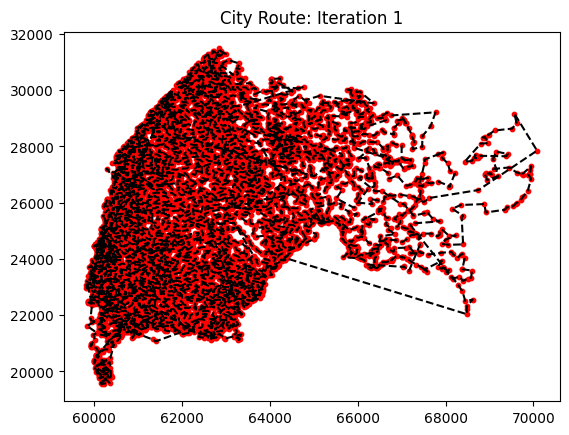

Iteration 1000
Iteration 2000


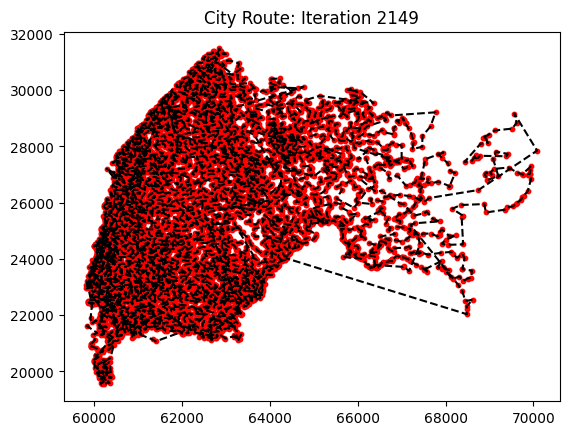

Execution Time: 58.00658583641052
Path: [0, 3, 35, 52, 66, 65, 64, 63, 34, 51, 75, 74, 116, 143, 117, 176, 211, 292, 291, 385, 496, 631, 694, 746, 747, 792, 843, 947, 993, 900, 946, 1034, 945, 791, 745, 629, 630, 562, 495, 384, 290, 289, 333, 383, 493, 560, 627, 628, 561, 494, 252, 210, 175, 142, 141, 174, 115, 209, 251, 250, 288, 332, 380, 381, 382, 433, 492, 626, 692, 693, 744, 790, 842, 841, 898, 897, 944, 943, 990, 1031, 1078, 1030, 989, 942, 941, 895, 838, 894, 893, 940, 988, 1029, 1076, 1028, 987, 1027, 1026, 986, 1025, 1119, 1120, 1165, 1166, 1167, 1247, 1246, 1248, 1291, 1292, 1293, 1332, 1249, 1169, 1168, 1077, 1170, 1171, 1204, 1294, 1295, 1250, 1205, 1173, 1172, 1121, 1079, 1032, 992, 991, 840, 896, 839, 743, 625, 559, 490, 491, 432, 331, 249, 287, 286, 248, 208, 172, 207, 285, 379, 624, 742, 892, 891, 939, 938, 985, 984, 937, 890, 889, 888, 936, 983, 982, 1024, 1070, 1114, 1159, 1160, 1161, 1162, 1115, 1071, 1116, 1163, 1202, 1243, 1290, 1242, 1201, 1241, 1289, 1288, 1368, 

In [22]:
# Step 1
try:
    coord_list = fileloader()
except Exception as e:
    print('예외 발생', e)
    sys.exit()

start_time = time.time()

best_path, best_cost = ga(coord_list)

print('Execution Time: ' + str(time.time() - start_time))
print('Path: ' + str(best_path.tolist()))
print('Cost: ' + str(best_cost))

## 

#  

# [Level 2: Approaching] Improved Algorithm Code

## Improved Greedy

In [40]:
from tqdm import tqdm

In [53]:
def path_cost(path_map, path):
    # The array of cost between cities in the path
    cnt_cities = path_map.shape[0]
    cost_arr = np.zeros(cnt_cities)
    for i in range(cnt_cities):
        cost_arr[i] = path_map[path[i], path[i+1]]

    return cost_arr

def greedy(coord_list):
    cnt_cities = len(coord_list)
    # Initialize path and insert first city index to the first and last elements
    best_path = np.full(cnt_cities+1, -1, dtype=np.int32)
    # random select first city
    FIRST_IDX = np.random.randint(cnt_cities+1, size=1)[0]
    best_path[0], best_path[-1] = FIRST_IDX, FIRST_IDX

    # Euclidean distance map between cities
    path_map = euclidean_distances(coord_list, coord_list)

    cities_tovisit = np.ones((cnt_cities), dtype=np.bool_)
    cities_tovisit[FIRST_IDX] = False

    # Iteratively Connect nearest cities
    for i in tqdm(range(1, cnt_cities)):
        # jump already selected path
        if best_path[i] != -1:
            continue
            
        start_idx = best_path[i - 1]
        distance_from_start = path_map[start_idx, :]
        nearest_list = np.argsort(distance_from_start)
        
        # next city candidates        
        candidate_cities = []
        # set candidate number to 0.5% of number of cities
#         CANDIDATE_NUMBER = cnt_cities // 200 + 1
        ### modified to constant number ###
        CANDIDATE_NUMBER = 10
        
        for idx in range(len(nearest_list)):
            # check the nearest city is visited
            if cities_tovisit[nearest_list[idx]]:
                nearest_city = nearest_list[idx]
                # add to candidate city list
                candidate_cities.append(nearest_city)
                if len(candidate_cities)==CANDIDATE_NUMBER:
                    break
        
        # set lookahead number to 5% of number of cities
#         LOOKAHEAD_NUMBER = cnt_cities // 20 + 1
        ### modified to constant number ###
        LOOKAHEAD_NUMBER = 20
        # lookahead cost list for candidate cities
        candidate_cost = []
        candidate_path = []
        candidate_cities_tovisit = []
        # greedy algorithm for candidate cities
        for candidate_city in candidate_cities:
            # initialize lookahead cost to distance from current city to candidate city
            lookahead_cost = path_map[start_idx, candidate_city]
            # copy arrays
            lookahead_path = best_path.copy()
            lookahead_cities_tovisit = cities_tovisit.copy()
            # visit candidate city
            lookahead_path[i] = candidate_city
            lookahead_cities_tovisit[candidate_city] = False
            # perform greedy for lookahead 
            for j in range(i+1, min(i+LOOKAHEAD_NUMBER, cnt_cities)):
                candidate_start_idx = lookahead_path[j-1]
                distance_from_candidate = path_map[candidate_start_idx, :]
                nearest_list_candidate = np.argsort(distance_from_candidate)
                for c_idx in range(len(nearest_list_candidate)):
                    if lookahead_cities_tovisit[nearest_list_candidate[c_idx]]:
                        candidate_nearest_city = nearest_list_candidate[c_idx]
                        break
                lookahead_cities_tovisit[candidate_nearest_city] = False
                lookahead_path[j] = candidate_nearest_city
                # update lookahead cost
                lookahead_cost += path_map[candidate_start_idx, candidate_nearest_city]
            # add lookahead cost
            candidate_cost.append(lookahead_cost)
            candidate_path.append(lookahead_path)
            candidate_cities_tovisit.append(lookahead_cities_tovisit)
        
        # select minimum lookahead cost
        next_path_candidate_idx_sort = np.argsort(candidate_cost)
        # select next path
        cities_tovisit = candidate_cities_tovisit[next_path_candidate_idx_sort[0]].copy()
        best_path = candidate_path[next_path_candidate_idx_sort[0]].copy()
        
        
    cost_arr = path_cost(path_map, best_path)
    best_cost = cost_arr.sum()
    
    # Draw Route
    if PLOT_MODE:
        plt.close()
        figure, ax = plt.subplots()
        plt.scatter(coord_list[:, 0], coord_list[:, 1], c='red', s=10)
        plt.title('City Route')
        coord_path = coord_list
        coord_path = np.append(coord_path, coord_path[best_path[0], :].reshape(1, 2), axis=0)
        coord_path[:, :] = coord_path[best_path, :]
        lines, = ax.plot(coord_path[:, 0], coord_path[:, 1], 'k--')
        figure.canvas.draw()
        figure.canvas.flush_events()
        plt.show()
    
    return best_path, best_cost, cost_arr

100%|████████████████████████████████████| 10637/10637 [00:52<00:00, 202.23it/s]


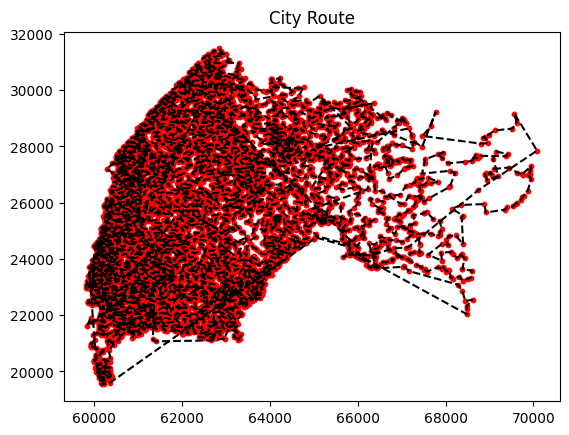

Execution Time: 53.150060176849365
Path: [4051, 3919, 3876, 3839, 3723, 3724, 3553, 3484, 3454, 3424, 3554, 3588, 3555, 3425, 3388, 3426, 3485, 3519, 3427, 3556, 3725, 3726, 3800, 3727, 3680, 3641, 3728, 3765, 3801, 3879, 3880, 3965, 3964, 4001, 4054, 4055, 4130, 4172, 4220, 4219, 4218, 4393, 4430, 4494, 4462, 4495, 4496, 4522, 4578, 4679, 4680, 4610, 4523, 4548, 4579, 4611, 4682, 4711, 4612, 4580, 4524, 4253, 4097, 3969, 3970, 3846, 3683, 3644, 3559, 3487, 3488, 3489, 3490, 3455, 3360, 3361, 3362, 3326, 3291, 3290, 3253, 3217, 3177, 3176, 3216, 3075, 3022, 3023, 2976, 2859, 2908, 2977, 2978, 3078, 3077, 3076, 3178, 3128, 3218, 3179, 3129, 3180, 3080, 3079, 2979, 2909, 2860, 2980, 2861, 2981, 2982, 3024, 3081, 3130, 3182, 3181, 3254, 3292, 3429, 3456, 3492, 3363, 3293, 3392, 3364, 3393, 3394, 3365, 3327, 3255, 3366, 3395, 3328, 3329, 3256, 3219, 3294, 3330, 3183, 3082, 3025, 2915, 2865, 2914, 2819, 2768, 2723, 2672, 2630, 2536, 2537, 2447, 2392, 2446, 2260, 2171, 2137, 2216, 2259, 2295

In [54]:
# Step 1
try:
    coord_list = fileloader()
except Exception as e:
    print('예외 발생', e)
    sys.exit()

start_time = time.time()

# Step 2
best_path, best_cost, cost_arr = greedy(coord_list)

print('Execution Time: ' + str(time.time() - start_time))
print('Path: ' + str(best_path.tolist()))
print('Cost: ' + str(best_cost))


## 

## Improved SA

In [78]:
# Global Variables
# SA
MAX_EVALUATION = 1000
SUB_ITERATIONS = 100
TEMPERATURE = 100
COOLING_RATIO_1 = 0.5
COOLING_RATIO_2 = 0.9
COOLING_RATIO_THRESHOLD = 50
HEATING_RATIO = 1.1
TEMP_LIMIT = 1

In [79]:
def initialize_greedy(coord_list, first_idx):
    cnt_cities = len(coord_list)
    # Initialize path and insert first city index to the first and last elements
    path = np.zeros(cnt_cities + 1, dtype=np.int32)
    # redefine first city index to random select
    first_idx = np.random.randint(cnt_cities, size=1)[0]
    path[0], path[-1] = first_idx, first_idx

    # Euclidean distance map between cities
    path_map = euclidean_distances(coord_list, coord_list)

    cities_tovisit = np.ones((cnt_cities), dtype=np.bool_)
    cities_tovisit[first_idx] = False

    # Iteratively Connect nearest cities
    for i in range(1, cnt_cities):
        start_idx = path[i - 1]
        distance_from_start = path_map[start_idx, :]
        nearest_list = np.argsort(distance_from_start)
        for idx in range(len(nearest_list)):
            # check the nearest city is visited
            if cities_tovisit[nearest_list[idx]]:
                nearest_city = nearest_list[idx]
                break
        cities_tovisit[nearest_city] = False
        path[i] = nearest_city

    return path_map, path

def path_cost(path_map, path):
    # The array of cost between cities in the path
    cnt_cities = path_map.shape[0]
    cost_arr = np.zeros(cnt_cities)
    for i in range(cnt_cities):
        cost_arr[i] = path_map[path[i], path[i+1]]

    return cost_arr

In [80]:
def two_opt_swap(path_map, path, iterations, coord_list, sa_start_time):
    cnt_cities = path_map.shape[0]
    # Save the best path

    cost_arr = path_cost(path_map, path)
    best_path = path.copy()
    best_cost = cost_arr.sum()
    
    # argsort cost array
    cost_idx_sort = np.argsort(cost_arr)
    
    # initialize temperature
    temperature = TEMPERATURE
    
    # for 10% of the longest distance cities in the path
    for c in range(cnt_cities//10):
        
        # check timeout
        if time.time()-sa_start_time>53:
            break
            
        # save best cost
        temp_cost = best_cost.copy()
        
        # check all cities with 2-opt transformation
        for i in range(cnt_cities):
            
            # check timeout
            if time.time()-sa_start_time>53:
                break
            
            curr_path = best_path.copy()
            # Select two indices of flip points, one with the c'th longest distance in path
            sel_idx = np.sort(np.array([cost_idx_sort[-1-c], i]))
            sel_idx[0]+=1
            if sel_idx[0]==sel_idx[1]:
                continue

            # Path Flip and update cost array
            curr_path[sel_idx[0]:sel_idx[1]] = np.flip(curr_path[sel_idx[0]: sel_idx[1]])
            curr_cost_arr = path_cost(path_map, curr_path)

            # Compare to the best path
            curr_cost = curr_cost_arr.sum()
            if curr_cost < best_cost:
                best_path = curr_path
                best_cost = curr_cost
        
        # if cost has reduced, break loop
        if best_cost < temp_cost:
            break
        # if the c'th longest distance in the path didn't reduced, heat temperature and continue loop
        else:
            temperature = temperature * HEATING_RATIO
    
    while temperature > TEMP_LIMIT:

        # check timeout
        if time.time()-sa_start_time>53:
            break
            
        curr_path = best_path.copy()
        # Select two indices of flip points
        sel_idx = np.sort(np.random.choice(np.arange(1, cnt_cities + 1), 2))

        # Path Flip and update cost array
        curr_path[sel_idx[0]:sel_idx[1]] = np.flip(curr_path[sel_idx[0]: sel_idx[1]])
        cost_arr = path_cost(path_map, curr_path)
        curr_cost = cost_arr.sum()

        if curr_cost <= best_cost:
            best_path, best_cost = curr_path, curr_cost
        else:
            prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))
            if prob > np.random.rand(1):
                best_path, best_cost = curr_path, curr_cost
        
        # if temperature lower than the threshold, apply another cooling ratio
        if temperature < COOLING_RATIO_THRESHOLD:
            temperature = temperature * COOLING_RATIO_2
        else:
            temperature = temperature * COOLING_RATIO_1
    return best_path, best_cost

In [81]:
def sa(path_map, path, coord_list):
    sa_start_time = time.time()
    best_path, best_cost = path.copy() , path_cost(path_map, path).sum()
    global TEMPERATURE
    
    # set max evaluation number to number of cities
    MAX_EVALUATION = path_map.shape[0]

    for i in range(MAX_EVALUATION):
        
        # check timeout
        if time.time()-sa_start_time>53:
            break
            
        curr_path = best_path.copy()
        new_path, new_cost = two_opt_swap(path_map, curr_path, SUB_ITERATIONS, coord_list, sa_start_time)

        if new_cost < best_cost:
            best_path, best_cost = new_path, new_cost

    if PLOT_MODE:
        plt.close()
        figure, ax = plt.subplots()
        plt.scatter(coord_list[:, 0], coord_list[:, 1], c='red', s=10)
        plt.title('City Route')
        coord_path = coord_list
        coord_path = np.append(coord_path, coord_path[best_path[0], :].reshape(1, 2), axis=0)
        coord_path[:, :] = coord_path[best_path, :]
        lines, = ax.plot(coord_path[:, 0], coord_path[:, 1], 'k--')
        figure.canvas.draw()
        figure.canvas.flush_events()
        plt.show()

    return best_path, best_cost

/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/1914097468.py:74: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


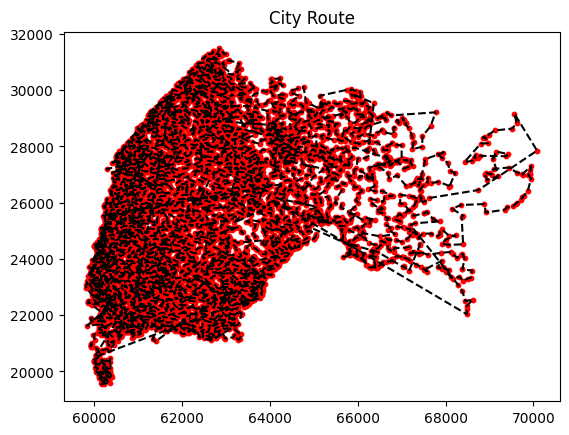

Execution Time: 59.117263078689575
Path: [2265, 2266, 2219, 2298, 2299, 2348, 2399, 2453, 2454, 2455, 2498, 2545, 2591, 2590, 2544, 2497, 2398, 2347, 2349, 2350, 2267, 2268, 2300, 2301, 2456, 2457, 2499, 2592, 2679, 2546, 2400, 2351, 2145, 2144, 2143, 2087, 2020, 1943, 1942, 1941, 1894, 1853, 1940, 2019, 2142, 2221, 2220, 2053, 2086, 2141, 2052, 1974, 1936, 1892, 1937, 1938, 1893, 1939, 1816, 1763, 1815, 1814, 1723, 1724, 1722, 1721, 1678, 1587, 1492, 1442, 1493, 1538, 1588, 1443, 1402, 1238, 1200, 1157, 1199, 1109, 931, 776, 738, 683, 682, 615, 549, 423, 681, 930, 1066, 1065, 1064, 929, 979, 1020, 1234, 1235, 1284, 1236, 1156, 1324, 1537, 1720, 1627, 1490, 1491, 1441, 1585, 1586, 1677, 1762, 1813, 1973, 2018, 2085, 2139, 2218, 2174, 2140, 2175, 2264, 2297, 2263, 2346, 2345, 2396, 2451, 2452, 2397, 2496, 2543, 2542, 2589, 2634, 2676, 2728, 2824, 2872, 2990, 2774, 2727, 2675, 2633, 2540, 2494, 2493, 2492, 2539, 2491, 2449, 2394, 2395, 2341, 2342, 2296, 2343, 2344, 2450, 2495, 2541, 2921

In [82]:
# Initialization ###############
initialize = initialize_greedy
################################

# Step 1
try:
    coord_list = fileloader()
except Exception as e:
    print('예외 발생', e)
    sys.exit()

start_time = time.time()
# Step 2
path_map, path = initialize(coord_list, FIRST_IDX)

# Step 3
best_path, best_cost = sa(path_map, path, coord_list)

print('Execution Time: ' + str(time.time() - start_time))
print('Path: ' + str(best_path.tolist()))
print('Cost: ' + str(best_cost))

## 

## Improved GA

In [112]:
# Global Variables
# GA
POOL_SIZE = 20 
TOURNAMENT_SIZE = 10
MAX_ITERATION = 100000

# SA
### modified due to time constraint ###
MAX_EVALUATION = 25
SUB_ITERATIONS = 10
TEMPERATURE = 50
COOLING_RATIO = 0.3
TEMP_LIMIT = 1

In [98]:
def initialize_greedy(coord_list, first_idx):
    cnt_cities = len(coord_list)
    # Initialize path and insert first city index to the first and last elements
    path = np.zeros(cnt_cities + 1, dtype=np.int32)
    path[0], path[-1] = first_idx, first_idx

    # Euclidean distance map between cities
    path_map = euclidean_distances(coord_list, coord_list)

    cities_tovisit = np.ones((cnt_cities), dtype=np.bool_)
    cities_tovisit[first_idx] = False

    # Iteratively Connect nearest cities
    for i in range(1, cnt_cities):
        start_idx = path[i - 1]
        distance_from_start = path_map[start_idx, :]
        nearest_list = np.argsort(distance_from_start)
        for idx in range(len(nearest_list)):
            # check the nearest city is visited
            if cities_tovisit[nearest_list[idx]]:
                nearest_city = nearest_list[idx]
                break
        cities_tovisit[nearest_city] = False
        path[i] = nearest_city

    return path_map, path


def initialize_random(coord_list, first_idx):
    cnt_cities = len(coord_list)
    path = np.zeros(cnt_cities + 1, dtype=np.int32)

    path[0], path[-1] = first_idx, first_idx
    # Euclidean distance map between cities
    path_map = euclidean_distances(coord_list, coord_list)

    # city indices without first city index
    cities_tovisit = np.delete(np.arange(cnt_cities), first_idx)
    cities_random = np.random.permutation(cities_tovisit)
    path[1:-1] = cities_random

    return path_map, path

def path_cost(path_map, path):
    # The array of cost between cities in the path
    cnt_cities = path_map.shape[0]
    cost_arr = np.zeros(cnt_cities)
    for i in range(cnt_cities):
        cost_arr[i] = path_map[path[i], path[i+1]]

    return cost_arr

In [99]:
def two_opt_swap(path_map, path, iterations, coord_list):
    cnt_cities = path_map.shape[0]
    # Save the best path

    cost_arr = path_cost(path_map, path)
    best_path = path.copy()
    best_cost = cost_arr.sum()
    
    for i in range(iterations):
        curr_path = best_path.copy()
        # Select two indices of flip points
        sel_idx = np.sort(np.random.choice(np.arange(1, cnt_cities + 1), 2))

        # Path Flip and update cost array
        curr_path[sel_idx[0]:sel_idx[1]] = np.flip(curr_path[sel_idx[0]: sel_idx[1]])
        cost_arr = path_cost(path_map, curr_path)

        # Compare to the best path
        curr_cost = cost_arr.sum()
        if curr_cost < best_cost:
            best_path = curr_path
            best_cost = curr_cost
    
    temperature = TEMPERATURE
    while temperature > TEMP_LIMIT:
        curr_path = best_path.copy()
        # Select two indices of flip points
        sel_idx = np.sort(np.random.choice(np.arange(1, cnt_cities + 1), 2))

        # Path Flip and update cost array
        curr_path[sel_idx[0]:sel_idx[1]] = np.flip(curr_path[sel_idx[0]: sel_idx[1]])
        cost_arr = path_cost(path_map, curr_path)
        curr_cost = cost_arr.sum()

        if curr_cost <= best_cost:
            best_path, best_cost = curr_path, curr_cost
        else:
            prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))
            if prob > np.random.rand(1):
                best_path, best_cost = curr_path, curr_cost
        temperature = temperature * COOLING_RATIO 
    return best_path, best_cost

In [100]:
def sa(path_map, path, coord_list):
    best_path, best_cost = path.copy() , path_cost(path_map, path).sum()

    for i in range(MAX_EVALUATION):
        curr_path = best_path.copy()
        new_path, new_cost = two_opt_swap(path_map, curr_path, SUB_ITERATIONS, coord_list)

        if new_cost < best_cost:
            best_path, best_cost = new_path, new_cost
            
    return best_path, best_cost

In [101]:
def initialization(coord_list):
    cnt_cities = len(coord_list)
    path_pool = np.zeros((POOL_SIZE, cnt_cities + 1), dtype=np.int32)
    pool_cost = np.zeros(POOL_SIZE)
    
    path_map, path_pool[0, :] = initialize_greedy(coord_list, FIRST_IDX)
    pool_cost[0] = path_cost(path_map, path_pool[0, :]).sum()

    print('Path {} is initialized'.format(0))

    for i in range(1, POOL_SIZE):
        _, path_pool[i, :] = initialize_random(coord_list, FIRST_IDX)
        path_pool[i, :], pool_cost[i] = sa(path_map, path_pool[i, :], coord_list)
        print('Path {} is initialized'.format(i))
    
    return path_pool, pool_cost, path_map

In [102]:
def selection(pool_cost, TOURNAMENT_SIZE, sel_size=2):
    # tournament selection
    sel_idx = np.random.choice(pool_cost.shape[0], TOURNAMENT_SIZE, replace=False)
    sel_cost = pool_cost[sel_idx]
    best_idx = sel_idx[np.argsort(sel_cost)][:sel_size]
    return best_idx

In [103]:
# ox crossover
def oxcrossover(path1, path2):
    cnt_cities = len(path1) - 1
    # Select two indices of crossover points
    sel_idx = np.sort(np.random.choice(np.arange(1, cnt_cities), 2))
    
    # Initialize child path 1~4
    child_path_1 = np.zeros(cnt_cities + 1, dtype=np.int32)
    child_path_2 = np.zeros(cnt_cities + 1, dtype=np.int32)
    child_path_3 = np.zeros(cnt_cities + 1, dtype=np.int32)
    child_path_4 = np.zeros(cnt_cities + 1, dtype=np.int32)
    
    child_path_1[0], child_path_1[-1] = -1, -1
    child_path_2[0], child_path_2[-1] = -1, -1
    child_path_3[0], child_path_3[-1] = -1, -1
    child_path_4[0], child_path_4[-1] = -1, -1
    
    # Copy the path between crossover points
    child_path_1[sel_idx[0]:sel_idx[1]] = path1[sel_idx[0]:sel_idx[1]]
    child_path_2[sel_idx[0]:sel_idx[1]] = path2[sel_idx[0]:sel_idx[1]]
    
    # Copy the rest of the path from another path
    path2_idx = np.where(np.isin(path2, child_path_1) == False)[0]
    child_path_1[np.where(child_path_1 == 0)[0]] = path2[path2_idx]
    child_path_1[0], child_path_1[-1] = FIRST_IDX, FIRST_IDX

    path1_idx = np.where(np.isin(path1, child_path_2) == False)[0]
    child_path_2[np.where(child_path_2 == 0)[0]] = path1[path1_idx]
    child_path_2[0], child_path_2[-1] = FIRST_IDX, FIRST_IDX

    
    # Reverse the subpath and save to child path 3 4
    child_path_3 = child_path_1.copy()
    child_path_3[sel_idx[0]:sel_idx[1]] = np.flip(child_path_3[sel_idx[0]:sel_idx[1]])
    child_path_4 = child_path_2.copy()
    child_path_4[sel_idx[0]:sel_idx[1]] = np.flip(child_path_4[sel_idx[0]:sel_idx[1]])
    
    return [child_path_1, child_path_2, child_path_3, child_path_4]

In [104]:
# pmx crossover
def pmxcrossover(path1, path2):
    cnt_cities = len(path1) - 1
    # Select two indices of crossover points
    sel_idx = np.sort(np.random.choice(np.arange(1, cnt_cities), 2))

    # Initialize child paths 1~4
    child_path_1 = np.zeros(cnt_cities + 1, dtype=np.int32)
    child_path_2 = np.zeros(cnt_cities + 1, dtype=np.int32)
    child_path_3 = np.zeros(cnt_cities + 1, dtype=np.int32)
    child_path_4 = np.zeros(cnt_cities + 1, dtype=np.int32)
    
    child_path_1[0], child_path_1[-1] = -1, -1
    child_path_2[0], child_path_2[-1] = -1, -1
    child_path_3[0], child_path_3[-1] = -1, -1
    child_path_4[0], child_path_4[-1] = -1, -1
    
    # Copy the path between crossover points
    child_path_1[sel_idx[0]:sel_idx[1]] = path1[sel_idx[0]:sel_idx[1]]
    child_path_2[sel_idx[0]:sel_idx[1]] = path2[sel_idx[0]:sel_idx[1]]
    
    # Partially map cities in subpath
    del_list = []
    part_map = {c1:c2 for c1,c2 in zip(path1[sel_idx[0]:sel_idx[1]], path2[sel_idx[0]:sel_idx[1]])}
    part_map_r = {c2:c1 for c1,c2 in part_map.items()}
    for c1 in path1[sel_idx[0]:sel_idx[1]]:
        if c1 not in part_map_r.keys():
            while part_map[c1] in part_map.keys():
                part_map[c1]=part_map[part_map[c1]]
        else:
            del_list.append(c1)
    for c in del_list:
        del part_map[c]

    # Make a replaced path for the partially mapped cities
    path2_replaced = path2.copy()
    path1_replaced = path1.copy()
    for c1, c2 in part_map.items():
        path2_replaced[np.where(path2==c1)[0]] = c2
        path1_replaced[np.where(path1==c2)[0]] = c1
    
    # Copy the rest of the path from the replaced path
    child_path_1[:sel_idx[0]], child_path_1[sel_idx[1]:] = path2_replaced[:sel_idx[0]], path2_replaced[sel_idx[1]:]
    child_path_2[:sel_idx[0]], child_path_2[sel_idx[1]:] = path1_replaced[:sel_idx[0]], path1_replaced[sel_idx[1]:]
    
    # Reverse the subpath and save to child path 3 4
    child_path_3 = child_path_1.copy()
    child_path_3[sel_idx[0]:sel_idx[1]] = np.flip(child_path_3[sel_idx[0]:sel_idx[1]])
    child_path_4 = child_path_2.copy()
    child_path_4[sel_idx[0]:sel_idx[1]] = np.flip(child_path_4[sel_idx[0]:sel_idx[1]])
    
    return [child_path_1, child_path_2, child_path_3, child_path_4]

In [105]:
# 2-opt mutation
def mutation_2opt(path):
    cnt_cities = len(path)
    child_path = path.copy()
    
    # Select two indices of mutation points
    sel_idx = np.sort(np.random.choice(np.arange(1, cnt_cities), 2))
    
    # Swap the path between mutation points
    child_path[sel_idx[0]:sel_idx[1]] = np.flip(child_path[sel_idx[0]:sel_idx[1]])

    return child_path 

In [106]:
# single point mutation
def mutation_singlepoint(path):
    cnt_cities = len(path)
    child_path = np.zeros(cnt_cities, dtype=np.int32)
    
    # Select single index of mutation point
    sel_idx = np.random.choice(np.arange(2, cnt_cities-1), 1)[0]
    
    # Swap two subpaths divided by single mutation point
    child_path[1:cnt_cities-sel_idx] = path[sel_idx:-1]
    child_path[cnt_cities-sel_idx:-1] = path[1:sel_idx]
    
    return child_path

In [107]:
# three-point mutation
def mutation_threepoint(path):
    cnt_cities = len(path)
    child_path = path.copy()
    
    # Select three indices of mutation points
    sel_idx = np.sort(np.random.choice(np.arange(1, cnt_cities-2), 3))
    
    # Swap the subpaths
    child_path[sel_idx[0]:sel_idx[0]+sel_idx[2]-sel_idx[1]], child_path[sel_idx[0]+sel_idx[2]-sel_idx[1]:sel_idx[2]] = path[sel_idx[1]:sel_idx[2]], path[sel_idx[0]:sel_idx[1]]
    
    return child_path

In [108]:
# genetic algorithm
def ga(coord_list):
    ga_start_time = time.time()
    best_cost = np.Inf
    print('Start Genetic Algorithm')
    print('Initialize the population')
    path_pool, pool_cost, path_map = initialization(coord_list)
    print('Start the evolution')
    for i in range(MAX_ITERATION):
        
        # check timeout
        if time.time() - ga_start_time > 58:
            break
        
        if (i+1) % 1000 == 0:
            print('Iteration {}'.format(i + 1))
        
        # selection
        sel_idx = selection(pool_cost, TOURNAMENT_SIZE, sel_size=7)
        
        # OX crossover
        child_ox_list = oxcrossover(path_pool[sel_idx[0]], path_pool[sel_idx[2]])
        cost_ox_list = []
        for child in child_ox_list:
            cost_ox_list.append(path_cost(path_map, child).sum())
        
        # PMX crossover
        child_pmx_list = pmxcrossover(path_pool[sel_idx[1]], path_pool[sel_idx[3]])
        cost_pmx_list = []
        for child in child_pmx_list:
            cost_pmx_list.append(path_cost(path_map, child).sum())
        
        # 2opt mutation
        child_mut_swap = mutation_2opt(path_pool[sel_idx[4]])
        cost_mut_swap = path_cost(path_map, child_mut_swap).sum()
        
        # single point mutation
        child_mut_singlepoint = mutation_singlepoint(path_pool[sel_idx[5]])
        cost_mut_singlepoint = path_cost(path_map, child_mut_singlepoint).sum()
        
        # three-point mutation
        child_mut_threepoint = mutation_threepoint(path_pool[sel_idx[6]])
        cost_mut_threepoint = path_cost(path_map, child_mut_threepoint).sum()
        
        # replacement
        # initialize tournament pool
        pool_argsort = np.argsort(pool_cost)
        tournament_path_pool = path_pool[pool_argsort[POOL_SIZE//2:], :]
        tournament_pool_cost = pool_cost[pool_argsort[POOL_SIZE//2:]]
        
        # add all child solutions to the tournament pool
        tournament_path_pool = np.concatenate((tournament_path_pool, np.array(child_ox_list), 
                                               np.array(child_pmx_list),
                                               np.array([child_mut_swap, 
                                                         child_mut_singlepoint, 
                                                         child_mut_threepoint
                                                        ])
                                              ))
        tournament_pool_cost = np.concatenate((tournament_pool_cost, cost_ox_list, 
                                               cost_pmx_list, 
                                               [cost_mut_swap, 
                                                cost_mut_singlepoint, 
                                                cost_mut_threepoint
                                               ]
                                              ))
        
        # selection with tournament selection algorithm
        tour_idx = selection(tournament_pool_cost, 
                            TOURNAMENT_SIZE=(POOL_SIZE+tournament_pool_cost.shape[0])//2, 
                            sel_size=POOL_SIZE//2)
        
        # add selected solutions to the pool
        path_pool = np.concatenate((path_pool[pool_argsort[:POOL_SIZE//2], :], 
                                    tournament_path_pool[tour_idx,:]))
        pool_cost = np.concatenate((pool_cost[pool_argsort[:POOL_SIZE//2]], 
                                    tournament_pool_cost[tour_idx]))

        cur_idx = np.argmin(pool_cost)
        cur_path = path_pool[cur_idx]
        cur_cost = pool_cost[cur_idx]
        
        if best_cost > cur_cost:
            best_cost = cur_cost
            if PLOT_MODE:
                plt.close()
                figure, ax = plt.subplots()
                plt.scatter(coord_list[:, 0], coord_list[:, 1], c='red', s=10)
                plt.title('City Route: Iteration {}'.format(i + 1))
                coord_path = coord_list
                coord_path = np.append(coord_path, coord_path[FIRST_IDX, :].reshape(1, 2), axis=0)
                coord_path[:, :] = coord_path[cur_path, :]
                lines, = ax.plot(coord_path[:, 0], coord_path[:, 1], 'k--')
                figure.canvas.draw()
                figure.canvas.flush_events()
                plt.show()

    best_idx = np.argmin(pool_cost)
    return path_pool[best_idx], pool_cost[best_idx]

Start Genetic Algorithm
Initialize the population
Path 0 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 1 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 2 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 3 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 4 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 5 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 6 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 7 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 8 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 9 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 10 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 11 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 12 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 13 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 14 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 15 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 16 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 17 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 18 is initialized


/var/folders/qy/qpwfmy2x5kz6jkcq1rb246x80000gn/T/ipykernel_9695/2948270870.py:38: RuntimeWarning: overflow encountered in exp
  prob = 1 / np.exp((curr_cost - best_cost) / float(temperature))


Path 19 is initialized
Start the evolution


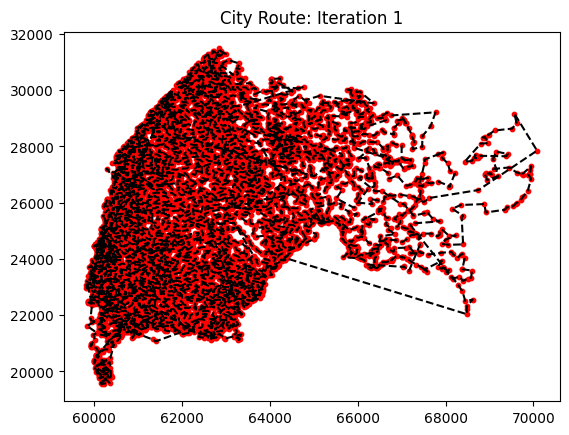

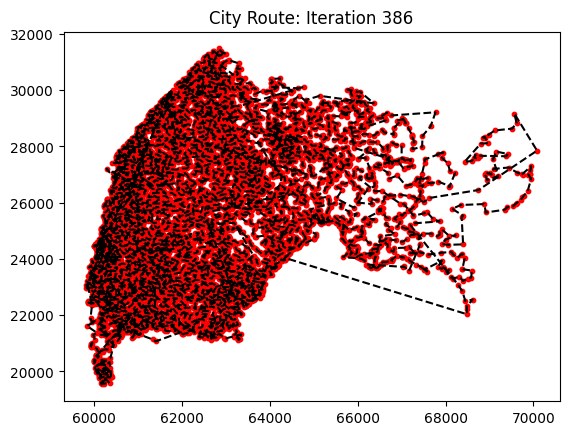

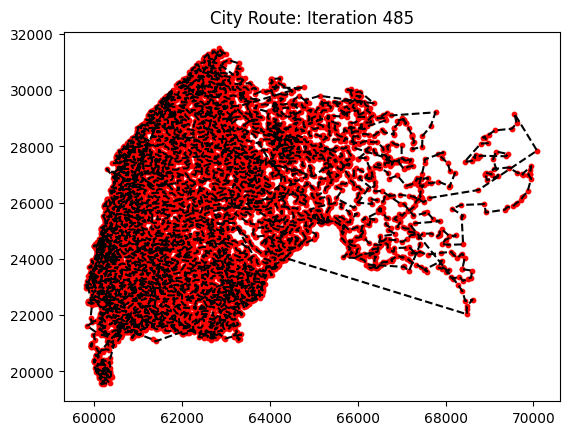

Iteration 1000
Execution Time: 58.01370096206665
Path: [0, 3, 35, 52, 66, 65, 64, 63, 34, 51, 75, 74, 116, 143, 117, 176, 211, 292, 291, 385, 496, 631, 694, 746, 747, 792, 843, 947, 993, 900, 946, 1034, 945, 791, 745, 629, 630, 562, 495, 384, 290, 289, 333, 383, 493, 560, 627, 628, 561, 494, 252, 210, 175, 142, 141, 174, 115, 209, 251, 250, 288, 332, 380, 381, 382, 433, 492, 626, 692, 693, 744, 790, 842, 841, 898, 897, 944, 943, 990, 1031, 1078, 1030, 989, 942, 941, 895, 838, 894, 893, 940, 988, 1029, 1076, 1028, 987, 1027, 1026, 986, 1025, 1119, 1120, 1165, 1166, 1167, 1247, 1246, 1248, 1291, 1292, 1293, 1332, 1249, 1169, 1168, 1077, 1170, 1171, 1204, 1294, 1295, 1250, 1205, 1173, 1172, 1121, 1079, 1032, 992, 991, 840, 896, 839, 743, 625, 559, 490, 491, 432, 331, 249, 287, 286, 248, 208, 172, 207, 285, 379, 624, 742, 892, 891, 939, 938, 985, 984, 937, 890, 889, 888, 936, 983, 982, 1024, 1070, 1114, 1159, 1160, 1161, 1162, 1115, 1071, 1116, 1163, 1202, 1243, 1290, 1242, 1201, 1241, 128

In [113]:
# Step 1
try:
    coord_list = fileloader()
except Exception as e:
    print('예외 발생', e)
    sys.exit()

start_time = time.time()

best_path, best_cost = ga(coord_list)

print('Execution Time: ' + str(time.time() - start_time))
print('Path: ' + str(best_path.tolist()))
print('Cost: ' + str(best_cost))

## 

# 

# [Level 3: Proficient] Comparison Analysis between TA sample code and improved algorithm

1. TA Sample Code
    1. Greedy Algorithm
        - Execution Time: 5.996981859207153
        - Cost: 647622.3022318124
    2. Simulated Annealing
        - Execution Time: 59.13148307800293
        - Cost: 647588.8248001325
    3. Genetic Algorithm
        - Execution Time: 58.00658583641052
        - Cost: 647444.7198537817
2. Improved Algorithm
    1. Greedy Algorithm
        - Execution Time: 53.150060176849365
        - Cost: 686667.1712497186
    2. Simulated Annealing
        - Execution Time: 59.117263078689575
        - Cost: 653411.6269109669
    3. Genetic Algorithm
        - Execution Time: 58.01370096206665
        - Cost: 647594.9282520313

The greedy algorithm sample code, which is the simplest function, is the only algorithm that had no modification or time limit break in the code while completing its function in 60 seconds. Others, except the improved simulated annealing algorithm, had some minor modifications in the code, such as adding a time limit or changing parameters, to complete their functions in 60 seconds. The cost of the solution path by each algorithm decreased in Greedy-SA-GA order, both for the sample code algorithms and the improved algorithms. But, all three algorithms of the improved version had a larger cost than the sample code. Although most algorithms had some modifications, we can conclude that for large-scale data and a short-time constraint, the improved algorithms show worse performance than the simple sample code.

## 

# 

# [Level 4: Exemplary] Problems and Solutions of Large-scale data

The problem with large-scale data is that the time complexity of an algorithm becomes extraordinarily large. Before modifying the parameters of the improved greedy algorithm, the Finland data of the National Traveling Salesman Problem, which has 10639 cities, took approximately more than 5 minutes, while the data which has 3649 cities from the previous assignment took less than 10 seconds. A 3 times increase in the number of cities leads to a 30 times increase in execution time. This will be similar to the simulated annealing algorithm and the genetic algorithm. Not only time complexity, but space complexity would be another problem.

To solve this time complexity problem of large-scale data, we can use the divide and conquer algorithm. By dividing the TSP problem into small TSP problems, we can reduce the time complexity, from exponential to linear time complexity. We can use clustering algorithms such as the k-means clustering algorithm to divide the large-scale TSP problem. After clustering the cities, we can solve TSP problems for each cluster and between clusters.
Also, we can use multi-processing computing power to improve the time complexity.